## HIV Model
### Jinfay Justin Yuan

In [231]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
from matplotlib.pyplot import twinx

In [232]:
def make_system(gammatau, mu, B, rho, alpha, delta, pi, sigma):
    """Make a system object for HIV model.
    
    gammatau: growth rate of CD4 Lymphocytes
    mu: HIV-independent death rate
    BV: infection rate
    rho: proportion of cells that become latently infected after infection
    alpha: activation rate
    delta: activation of latently infected cells before death
    pi: free virion production rate
    sigma: free virion removal rate
    
    returns: System object
    """
    init = State(Activated_CD4_Lymp=200,
                 Free_Virions=4e-7,
                 Latently_Infected_Cells=0,
                 Actively_Infected_Cells=0)
    t0 = 0
    t_end = 12000
    #Model seems to only run to 120 days
    
    return System(init=init, t0=t0, t_end=t_end, gammatau=gammatau,
                 mu=mu, B=B, rho=rho, alpha=alpha, delta=delta,
                 pi=pi, sigma=sigma)




In [233]:
def update_func(state,t,system):
    """Update the HIV model"""

    unpack(system)
    c,fv,lic,aic = state
    
    dcdt = gammatau-(mu * c)-(B * fv * c)    
    dlicdt = (rho * B * fv * c)-(mu * lic)-(alpha * lic)
    daicdt = ((1-rho) * (B * fv * c))+(alpha * lic) - (delta * aic)
    dfvdt = (pi * aic) - (sigma * fv)
    
    c += dcdt * .01
    fv += dfvdt * .01 
    lic += dlicdt * .01
    aic += daicdt * .01
    return State(Activated_CD4_Lymp=c,
                 Free_Virions=fv,
                 Latently_Infected_Cells=lic,
                 Actively_Infected_Cells=aic)

In [234]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    frame.index / 100
    return frame

In [238]:
def plot_results1(Activated_CD4_Lymp, Latently_Infected_Cells, Actively_Infected_Cells):

    plot(Activated_CD4_Lymp, '--', label='Number of CD4')
    #plot(Free_Virions, '--', label='Number of Free Virions')
    plot(Latently_Infected_Cells, '-', label='Number of Latently Infected Cells')
    plot(Actively_Infected_Cells, '-', label='Number of Actively Infected Cells')
    
    decorate(xlabel='Time *10^2 (days)',
             ylabel='Populaion')

In [239]:
def plot_results(Free_Virions):
    plot(Free_Virions, '--', label='Number of Free V)',
             ylabel='Populaion')irions')
    decorate(xlabel='Time *10^2 (days

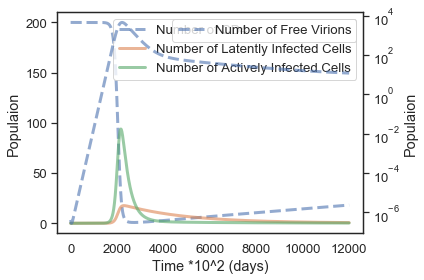

In [240]:
system1 = make_system(.272,.00136,.00027,0.1, .036, .33, 100, 2)
#gammatau, mu, B, rho, alpha, delta, pi, sigma
results = run_simulation(system1, update_func)
plot_results1(results.Activated_CD4_Lymp,results.Latently_Infected_Cells, results.Actively_Infected_Cells)
twinx()
plot_results(results.Free_Virions)
decorate(yscale="log")




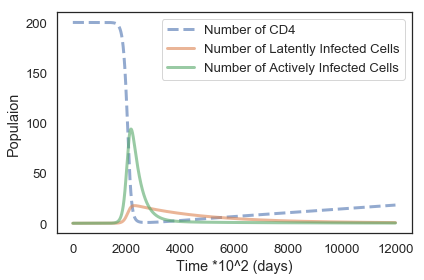

In [241]:
plot_results1(results.Activated_CD4_Lymp,results.Latently_Infected_Cells, results.Actively_Infected_Cells)

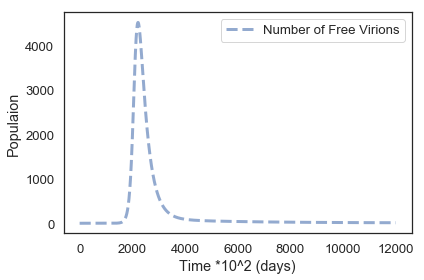

In [242]:
plot_results(results.Free_Virions)